# 🧪 Uncertainty and Physical Limits in Time Dilation

This notebook analyzes **theoretical and computational limits** of time dilation under special and general relativity.

We'll explore:
- Machine precision and float rounding effects
- Limits when `v << c` (near-zero dilation)
- Divergence near `v ≈ c` (gamma → ∞)
- Gravitational dilation edge case at 1 Rₛ (event horizon)
- Error propagation concepts (optional)

This helps understand where models remain valid and where caution is required when interpreting the data.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Constants
c = 299_792_458  # speed of light in m/s
t_proper = 1.0   # proper time in seconds
G = 6.67430e-11  # gravitational constant
M_sun = 1.9885e30  # mass of the sun in kg


## 🔁 Special Relativity: Lorentz Factor Limits

We analyze how `γ` behaves as `v → c`, and the effect of machine precision errors when `v` is very small or very close to `c`.


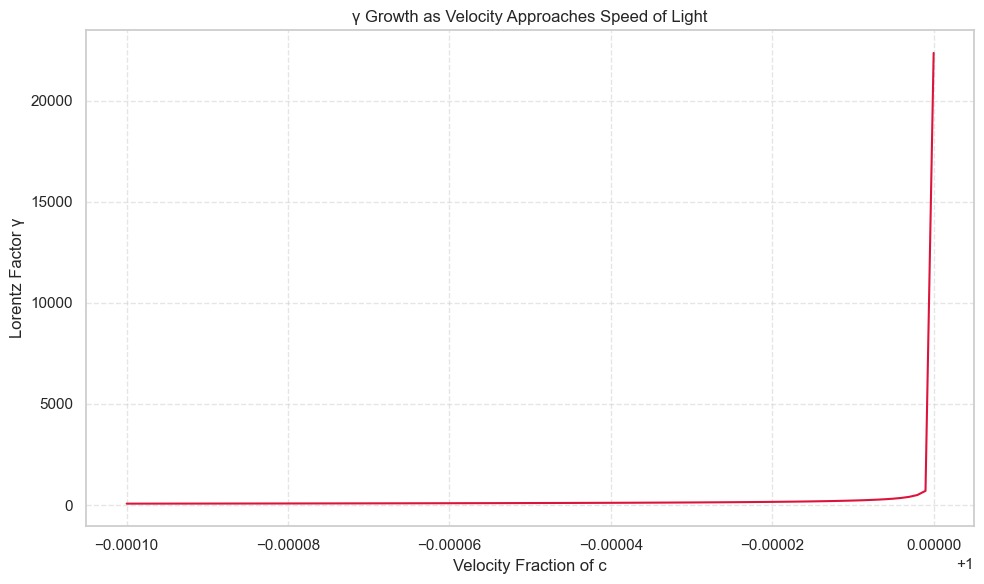

In [14]:
velocity_fractions = np.linspace(0.9999, 0.999999999, 100)
velocities = velocity_fractions * c
gamma = 1 / np.sqrt(1 - (velocities / c)**2)

plt.plot(velocity_fractions, gamma, color='crimson')
plt.xlabel("Velocity Fraction of c")
plt.ylabel("Lorentz Factor γ")
plt.title("γ Growth as Velocity Approaches Speed of Light")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ⚠️ Edge Case: Small Velocities (v ≪ c)

We check how time dilation behaves when velocity is extremely small. According to relativity, dilation should be negligible, but numerical instability may arise.

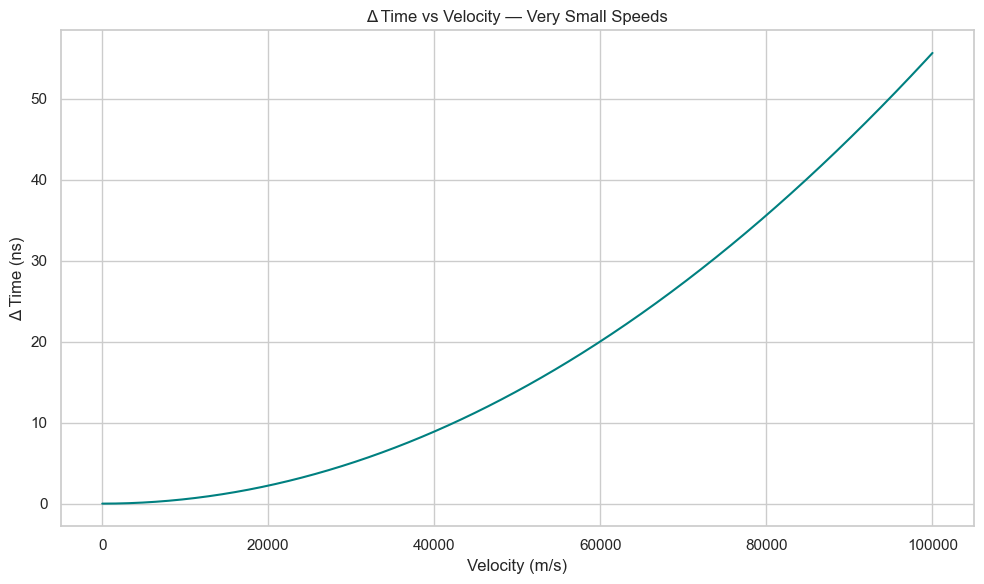

In [15]:
v_small = np.linspace(1, 100_000, 500)  # from 1 m/s to 100 km/s
gamma_small = 1 / np.sqrt(1 - (v_small / c)**2)
t_dilated_small = gamma_small * t_proper
delta_t_small = t_dilated_small - t_proper

plt.plot(v_small, delta_t_small * 1e9, color='teal')
plt.xlabel("Velocity (m/s)")
plt.ylabel("Δ Time (ns)")
plt.title("Δ Time vs Velocity — Very Small Speeds")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🕳️ General Relativity: Limit at 1 Rₛ

Here we test how the time dilation diverges as we approach the **Schwarzschild radius (1 Rₛ)**.


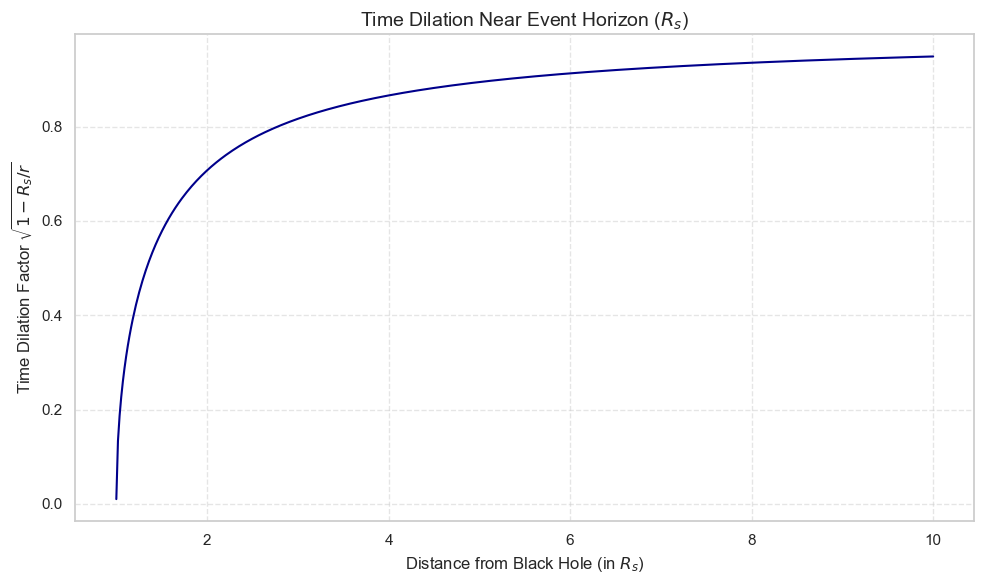

In [16]:
def gravitational_time_dilation(Rs, r):
    return np.sqrt(1 - Rs / r)

Rs = 2 * G * M_sun / c**2
r_values = np.linspace(1.0001 * Rs, 10 * Rs, 500)
dilation_factors = gravitational_time_dilation(Rs, r_values)

plt.plot(r_values / Rs, dilation_factors, color='darkblue')
plt.xlabel("Distance from Black Hole (in $R_s$)")
plt.ylabel("Time Dilation Factor $\\sqrt{1 - R_s / r}$")
plt.title("Time Dilation Near Event Horizon ($R_s$)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [17]:
summary = pd.DataFrame({
    "Scenario": ["v ≪ c", "v → c", "r → ∞", "r → Rₛ"],
    "Result": [
        "γ ≈ 1, Δt ≈ 0",
        "γ → ∞, Δt → ∞",
        "t_dilated ≈ t_proper",
        "t_dilated → 0 (for local observer)"
    ]
})

summary


,Scenario,Result
0,v ≪ c,"γ ≈ 1, Δt ≈ 0"
1,v → c,"γ → ∞, Δt → ∞"
2,r → ∞,t_dilated ≈ t_proper
3,r → Rₛ,t_dilated → 0 (for local observer)


## 📐 Optional: Error Propagation (Symbolic)

You can add error propagation using `sympy` if uncertainty in `v` or `r` exists. Let me know if you'd like this section implemented!


# ✅ Conclusions

- At **low velocities**, relativistic effects are negligible (Δt ≈ 0).
- As **velocity approaches c**, time dilation explodes → physical & numerical limit.
- **Near black holes**, time slows dramatically due to curved spacetime.
- **Floating-point errors** are minimal in practical simulations but become important in edge cases.

This notebook helps you identify when simulations are physically meaningful and when **limits or instability** may distort results.
